<a href="https://colab.research.google.com/github/Pravanop/WRAPS/blob/master/openstreetmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Boeing, Geoff. (2017). OSMNX: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks. 
# Computers Environment and Urban Systems. 65. 126-139. 10.1016/j.compenvurbsys.2017.05.004. 

In [ ]:
%%capture
!pip install osmnx
!pip install matplotlib==3.1.3

In [ ]:
import osmnx as ox
import networkx as nx

In [ ]:
place_name = "Kamppi, Helsinki, Finland"
graph = ox.graph_from_place(place_name, network_type='drive')

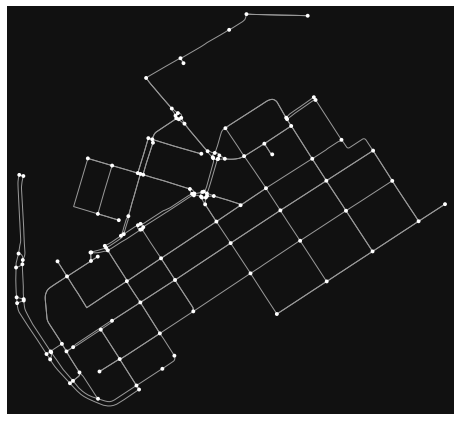

In [ ]:
graph_proj = ox.project_graph(graph)
fig, ax = ox.plot_graph(graph_proj)

In [ ]:
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)
nodes = ox.graph_to_gdfs(graph,nodes=True,edges=False)
edges.head()

osmid  ...  access
u        v          key                                                     ...        
25216594 1372425714 0                                             23856784  ...     NaN
25238874 1372425713 0                                 [29977177, 30470347]  ...     NaN
25238944 25216594   0                                 [372440330, 8135861]  ...     NaN
         319896278  0            [25514547, 677423564, 30288797, 30288799]  ...     NaN
25291537 25291591   0    [30568275, 36729015, 316590744, 316590745, 316...  ...     NaN

[5 rows x 11 columns]

In [ ]:
y = graph.edges()

In [ ]:
print(y)

[(25216594, 1372425714), (25238874, 1372425713), (25238944, 25216594), (25238944, 319896278), (25291537, 25291591), (25291537, 25291565), (25291537, 25292473), (25291564, 317703609), (25291564, 25291565), (25291564, 1377211669), (25291565, 1377211666), (25291565, 25291564), (25291565, 25291537), (25291591, 60170471), (25291591, 1377610493), (25292473, 25291537), (25416262, 60069401), (25416263, 1371748760), (25416263, 282731082), (25416267, 25416262), (56113314, 979855850), (56113314, 846597954), (56115897, 60278325), (56115897, 60072524), (56115897, 295322365), (56116937, 1372376956), (56116937, 1372376935), (56116937, 60004721), (56116937, 1372425724), (57743854, 60070287), (60004721, 1372376937), (60004721, 1372318837), (60004721, 268177652), (60004721, 56116937), (60069401, 25416262), (60070287, 1372441203), (60070287, 57743854), (60072524, 56115897), (60072524, 267117319), (60072524, 3177642345), (60170470, 1377211668), (60170470, 1377211669), (60170471, 1377211668), (60170471, 13

In [ ]:
import pandas as pd
df1 = pd.DataFrame(edges)

In [ ]:
print(df1.columns)

Index(['osmid', 'oneway', 'lanes', 'name', 'highway', 'maxspeed', 'length',
       'geometry', 'junction', 'bridge', 'access'],
      dtype='object')


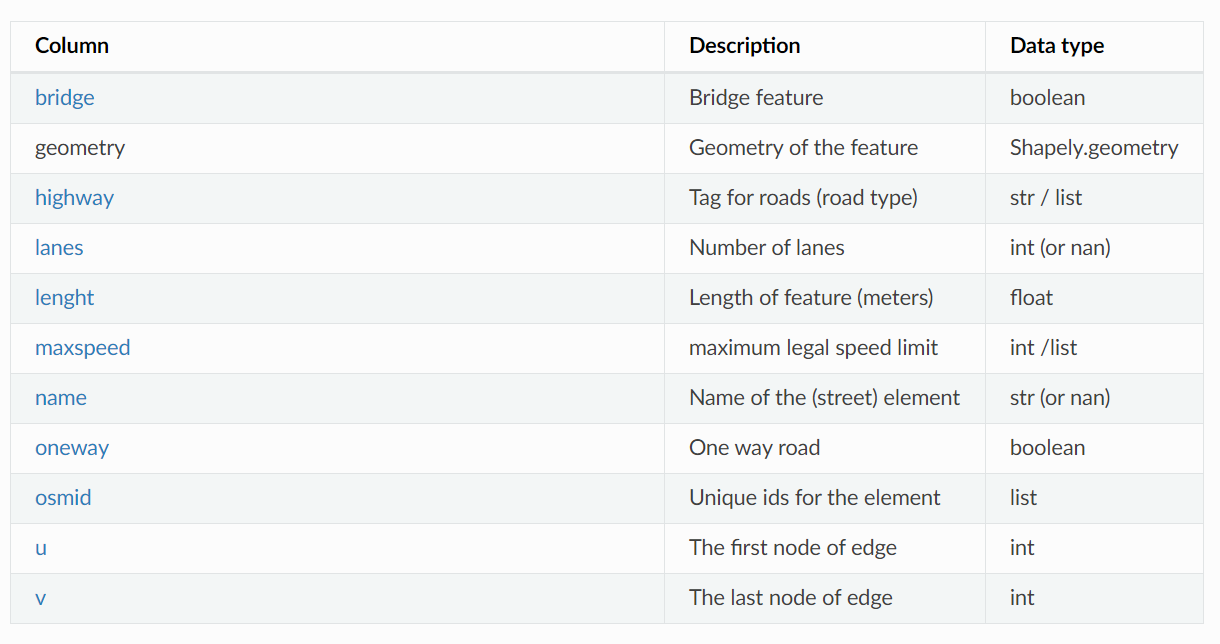

In [ ]:
print(edges['highway'].value_counts())

residential      113
tertiary          78
primary           26
secondary         17
unclassified      10
living_street      4
primary_link       1
Name: highway, dtype: int64


In [ ]:
stats = ox.basic_stats(graph_proj, circuity_dist='euclidean')
stats

{'circuity_avg': 1.0244622391466296,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None,
 'edge_density_km': None,
 'edge_length_avg': 80.26912048192777,
 'edge_length_total': 19987.011000000017,
 'intersection_count': 116,
 'intersection_density_km': None,
 'k_avg': 4.016129032258065,
 'm': 249,
 'n': 124,
 'node_density_km': None,
 'self_loop_proportion': 0.0,
 'street_density_km': None,
 'street_length_avg': 74.70925683060108,
 'street_length_total': 13671.793999999998,
 'street_segments_count': 183,
 'streets_per_node_avg': 3.217741935483871,
 'streets_per_node_counts': {0: 0, 1: 8, 2: 1, 3: 71, 4: 44},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.06451612903225806,
  2: 0.008064516129032258,
  3: 0.5725806451612904,
  4: 0.3548387096774194}}

In [ ]:
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [ ]:
graph_proj.nodes[25216594]

{'lat': 60.1647939,
 'lon': 24.9210566,
 'street_count': 4,
 'x': 384631.3223718022,
 'y': 6671580.070624193}

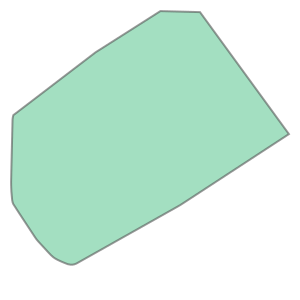

In [ ]:
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull

In [ ]:
source = convex_hull.centroid
nodes_proj['x'] = nodes_proj["x"].astype(float)
maxx = nodes_proj['x'].max()
target = nodes_proj.loc[nodes_proj['x']==maxx, 'geometry'].values[0]
# Get origin x and y coordinates
orig_xy = (source.y, source.x)
print(orig_xy)
# Get target x and y coordinates
target_xy = (target.y, target.x)
orig_node = ox.get_nearest_node(graph_proj, orig_xy, method='')
print(orig_node)
target_node = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')
o_closest = nodes_proj.loc[orig_node]
t_closest = nodes_proj.loc[target_node]

(6671717.293203075, 385170.0891607621)
301360197


In [ ]:

edges,nodes = ox.graph_to_gdfs(graph)
nodes


osmid  ...  access
u          v          key                                                     ...        
25216594   1372425714 0                                             23856784  ...     NaN
25238874   1372425713 0                                 [29977177, 30470347]  ...     NaN
25238944   25216594   0                                 [372440330, 8135861]  ...     NaN
           319896278  0            [25514547, 677423564, 30288797, 30288799]  ...     NaN
25291537   25291591   0    [30568275, 36729015, 316590744, 316590745, 316...  ...     NaN
...                                                                      ...  ...     ...
1973739965 282730959  0                      [329750716, 58015518, 58015511]  ...     NaN
2037356632 56113314   0                                            119613505  ...     NaN
           1547012339 0                                            193218627  ...     NaN
3177642345 60072524   0                    [886664916, 311975526, 314475703]  ...     NaN
3216400385 150983569  0                                             15240373  ...     NaN

[249 rows x 11 columns]

In [ ]:
x,y = edges['geometry'].iloc[0].coords.xy

In [ ]:
print(x,y)

array('d', [24.9210566, 24.9209527, 24.9209466, 24.9209462, 24.9209507]) array('d', [60.1647939, 60.1645634, 60.1645432, 60.1645009, 60.1644322])


In [ ]:
osmid_u = ox.get_nearest_edge(graph_proj, (x[0],y[0]))
osmid_v = ox.get_nearest_edge(graph_proj, (x[-1],y[-1]))
print(osmid_u,osmid_v)

(1372318829, 266159899, 0) (1372318829, 266159899, 0)


#Finding out average speed 

In [ ]:

import requests

In [ ]:
origins = []
destinations = []
time_series = []


for index,row in enumerate(graph.edges()):
  
  osmid_u,osmid_v = row[0],row[1]
  origins,destinations = coord_extractor(int(osmid_u),int(osmid_v),graph_proj)
  time = requestor(origins,destinations)
  time_series.append(time)
  print(str(index) + ' rows have been computed.')
  
def coord_extractor(osmid_u,osmid_v,graph):
  origins = []
  destinations = []
  temp_dict = {}
  temp_dict['latitude'], temp_dict['longitude'] = graph.nodes[osmid_u]['lat'],graph.nodes[osmid_u]['lon']
  origins.append(temp_dict)
  temp_dict = {}
  temp_dict['latitude'], temp_dict['longitude'] = graph.nodes[osmid_v]['lat'],graph.nodes[osmid_v]['lon']
  destinations.append(temp_dict)
  return origins,destinations

def requestor(orgins,destinations):
  api = 'ArAvNNUEiRVi3rGH7kSCrbdJRajzAvXogf3tquSfpc6eTppZWaIiSDnjViSC2cUS'  #encode this later
  url = 'https://dev.virtualearth.net/REST/v1/Routes/DistanceMatrix?key=' + api

  payload = {}
  payload["origins"] = origins
  payload["destinations"] = destinations
  payload["travelMode"] = 'Driving'
  r = requests.post(url=url, json=payload)
  print(r.text)
  r_json = r.json()
  dict_r = dict(r_json)
  time = dict_r['resourceSets'][0]['resources'][0]['results'][0]['travelDuration'] 
  return time






{"authenticationResultCode":"ValidCredentials","brandLogoUri":"http:\/\/dev.virtualearth.net\/Branding\/logo_powered_by.png","copyright":"Copyright © 2021 Microsoft and its suppliers. All rights reserved. This API cannot be accessed and the content and any results may not be used, reproduced or transmitted in any manner without express written permission from Microsoft Corporation.","resourceSets":[{"estimatedTotal":1,"resources":[{"__type":"DistanceMatrix:http:\/\/schemas.microsoft.com\/search\/local\/ws\/rest\/v1","destinations":[{"latitude":60.1644322,"longitude":24.9209507}],"origins":[{"latitude":60.1647939,"longitude":24.9210566}],"results":[{"destinationIndex":0,"originIndex":0,"totalWalkDuration":0,"travelDistance":0.68,"travelDuration":3.9167}]}]}],"statusCode":200,"statusDescription":"OK","traceId":"b75ecdf6bd4748a9a3b06adf81c1dd0e|BN000021E2|0.0.0.0|BN00001865"}
{"authenticationResultCode":"ValidCredentials","brandLogoUri":"http:\/\/dev.virtualearth.net\/Branding\/logo_power

In [ ]:
print(time_series)

[3.9167, 1.9, 0.3, 0.35]


# Djikstra's algorithm

In [ ]:
import time
start = time.time()
djik_route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.001279592514038086


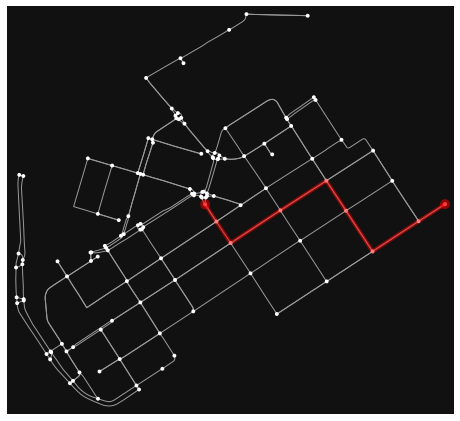

In [ ]:
fig, ax = ox.plot_graph_route(graph_proj,djik_route)

In [ ]:
print(orig_node)

301360197


#A* algorithm

In [ ]:
start = time.time()
def dist(a, b):
  (x1, y1) = (graph_proj.nodes(data=True)[a]['x'],graph_proj.nodes(data=True)[a]['y'])
  (x2, y2) = (graph.nodes(data=True)[b]['x'],graph_proj.nodes(data=True)[b]['y'])
  return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

astar_route = nx.astar_path(G= graph_proj, source=orig_node, target=target_node, heuristic=dist, weight='length')
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.0033180713653564453


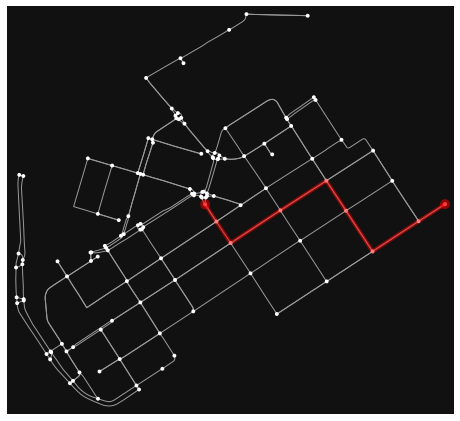

In [ ]:
fig, ax = ox.plot_graph_route(graph_proj,astar_route)